In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
lines = pd.read_csv('../data/All-seasons.csv')

In [3]:
lines.shape

(70896, 4)

In [4]:
lines.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [5]:
seasons = set(lines.loc[:,'Season'])
seasons

{'1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'Season'}

In [54]:
from collections import Counter

counts = Counter(lines.Character)
len(counts)

3950

In [7]:
most_common = counts.most_common(50)
most_common

[('Cartman', 9774),
 ('Stan', 7680),
 ('Kyle', 7099),
 ('Butters', 2602),
 ('Randy', 2467),
 ('Mr. Garrison', 1002),
 ('Chef', 917),
 ('Kenny', 881),
 ('Sharon', 862),
 ('Mr. Mackey', 633),
 ('Gerald', 626),
 ('Jimmy', 597),
 ('Wendy', 585),
 ('Liane', 582),
 ('Sheila', 566),
 ('Jimbo', 556),
 ('Announcer', 407),
 ('Stephen', 357),
 ('Craig', 326),
 ('Clyde', 317),
 ('Jesus', 312),
 ('Linda', 290),
 ('Principal Victoria', 289),
 ('Mrs. Garrison', 282),
 ('Terrance', 282),
 ('Token', 278),
 ('Timmy', 263),
 ('Mayor', 245),
 ('Tweek', 233),
 ('Phillip', 222),
 ('Bebe', 221),
 ('Man', 211),
 ('Woman', 204),
 ('Satan', 203),
 ('Ike', 200),
 ('Michael', 198),
 ('Shelly', 196),
 ('Chris', 193),
 ('Scott', 192),
 ('Pip', 189),
 ('Officer Barbrady', 174),
 ('Ms. Choksondik', 155),
 ('Narrator', 151),
 ('Dr. Doctor', 151),
 ('Barbrady', 150),
 ('Stuart', 148),
 ('Mr. Hankey', 148),
 ('Mephesto', 141),
 ('Doctor', 140),
 ('Kids', 137)]

Plotting characters with the most lines:

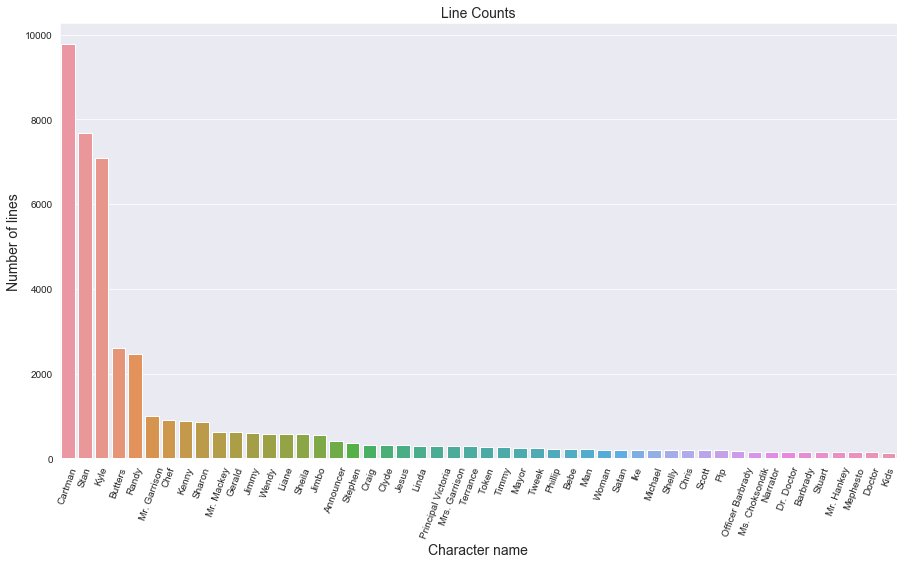

In [8]:
names = [tup[0] for tup in most_common]
counts = [tup[1] for tup in most_common]

fig = plt.subplots(figsize=(15,8))
_ = sns.barplot(names, counts)
_ = plt.xlabel('Character name', fontsize=14)
_ = plt.ylabel('Number of lines', fontsize=14)
_ = plt.title('Line Counts', fontsize=14)
_ = plt.xticks(rotation=70)

<b>Characters with few lines</b>

In [55]:
# All the line counts for each character
all_line_counts = counts.most_common()

In [71]:
# Extract characters with n or fewer lines
few_lines = [tup for tup in all_line_counts if tup[1] < 50]
len(few_lines)

3822

In [72]:
few_lines_names = [tup[0] for tup in few_lines]

In [79]:
new_lines = lines[~lines['Character'].isin(few_lines_names)]
new_counts = Counter(new_lines.Character)
print(len(new_lines), len(new_counts))

50963 128


Removing characters with less than 50 lines still leaves nearly 50,000 documents, but cuts the labels from nearly 4,000 down to 128.

<b>Word Corpus</b>

Creating the word corpus and removing `\n` pattern from the end of each line:

In [9]:
import re

corpus = lines.Line.tolist()

for line in range(len(corpus)):
    corpus[line] = re.sub('\\n', '', corpus[line].rstrip())
    
corpus[:10]

['You guys, you guys! Chef is going away.',
 'Going away? For how long?',
 'Forever.',
 "I'm sorry boys.",
 "Chef said he's been bored, so he joining a group called the Super Adventure Club.",
 'Wow!',
 'Chef?? What kind of questions do you think adventuring around the world is gonna answer?!',
 "What's the meaning of life? Why are we here?",
 "I hope you're making the right choice.",
 "I'm gonna miss him.  I'm gonna miss Chef and I...and I don't know how to tell him!"]

In [82]:
from tqdm import tqdm

new_corpus = new_lines.Line.tolist()

for line in tqdm(range(len(new_corpus))):
    new_corpus[line] = re.sub('\\n', '', new_corpus[line].rstrip())

100%|████████████████████████████████████████████████████████████████████████| 50963/50963 [00:00<00:00, 652149.27it/s]


<b>Token dictionary</b>

In [47]:
#Compile all words from the corpus into on long string,
#lower-case all words and remove punctuation.

import string

words = " ".join(corpus).lower()
words = " ".join(word.strip(string.punctuation) for word in words.split())

In [38]:
# Count the word frequencies with a Counter object
# Store the key, value pairs in an Ordered Dict

from collections import OrderedDict

word_counts = Counter(words.split())

token_dict = OrderedDict(word_counts.most_common())

Viewing the 15 most common words:

In [46]:
[(k, v) for k, v in token_dict.items()][:15]

[('you', 25194),
 ('the', 25119),
 ('to', 19777),
 ('i', 17712),
 ('a', 15256),
 ('and', 13361),
 ('it', 10200),
 ('is', 9802),
 ('of', 9369),
 ('we', 9231),
 ('that', 9068),
 ('in', 7398),
 ('what', 7217),
 ('this', 6857),
 ('have', 6167)]

<b>Average document length</b>

In [50]:
np.mean([len(doc.split()) for doc in corpus])    

11.453043895283232

<b>CountVectorizer and Naive Bayes</b><br>
Set up the vectors with `CountVectorizer` and establish the *X* and *y* variables.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
y = lines.Character

In [11]:
print(vectorizer.get_feature_names()[5100:5111])

['crammed', 'cramp', 'cramps', 'crampy', 'cramsonite', 'cranberries', 'crane', 'crank', 'crankshaft', 'cranky', 'crap']


In [12]:
print('Number of lines: ', len(corpus))
print('Number of tokens: ', len(vectorizer.get_feature_names()))

Number of lines:  70896
Number of tokens:  25528


Train-test splits

In [13]:
from sklearn.model_selection import train_test_split

state = 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=state)

Run naive bayes with the data splits

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_clf = MultinomialNB()

nb_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
train_pred = nb_clf.predict(X_train)
test_pred = nb_clf.predict(X_test)

print('Training accuracy is: ', accuracy_score(y_train, train_pred))
print('Test accuracy is: ', accuracy_score(y_test, test_pred))

Training accuracy is:  0.23956217558113294
Test accuracy is:  0.1843827578424735


<b>Re-test with `new_corpus` and updated n-grams</b>

In [83]:
vector = CountVectorizer(ngram_range=(2,5), max_df=0.9, strip_accents='ascii')

X = vector.fit_transform(new_corpus)
y = new_lines.Character

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=state)

new_nbclf = MultinomialNB()
new_nbclf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [85]:
train_pred = new_nbclf.predict(X_train)
test_pred = new_nbclf.predict(X_test)

print('Training accuracy is: ', accuracy_score(y_train, train_pred))
print('Test accuracy is: ', accuracy_score(y_test, test_pred))

Training accuracy is:  0.7576264978284758
Test accuracy is:  0.23954163723412605


This one is better overall, but has a serious issue with overfitting. 

<b>Word Cloud</b>

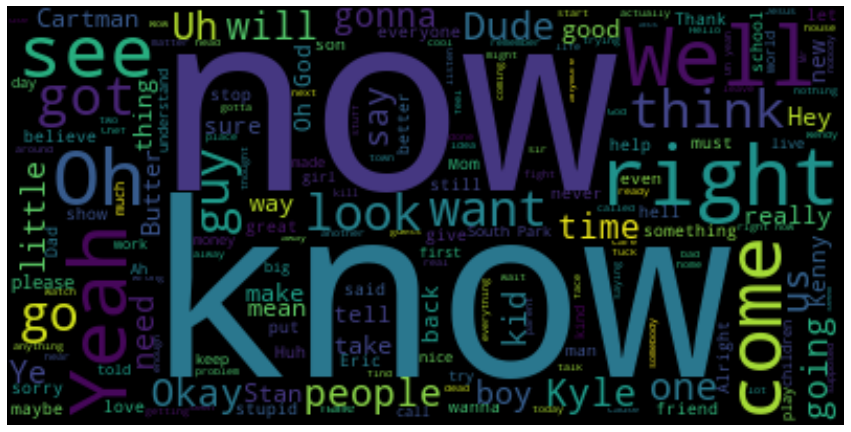

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(corpus))

fig = plt.subplots(figsize=(15,12))
_ = plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis('off')